In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score

In [2]:
def ent(labels, base=None):
    value, counts = np.unique(labels, return_counts=True)
    return entropy(counts, base=base)

In [14]:
df_test = np.array(pd.read_csv("./data/train_2008.csv"))

X_test = df_test[:, 0:-1]
Y_test = df_test[:, -1]

entros = []
MIs = []
for feature in X_test.T:
    entros.append(ent(feature, 2))
    MIs.append(mutual_info_score(feature, Y_test))
    
entros = np.array(entros)
MIs = np.array(MIs)

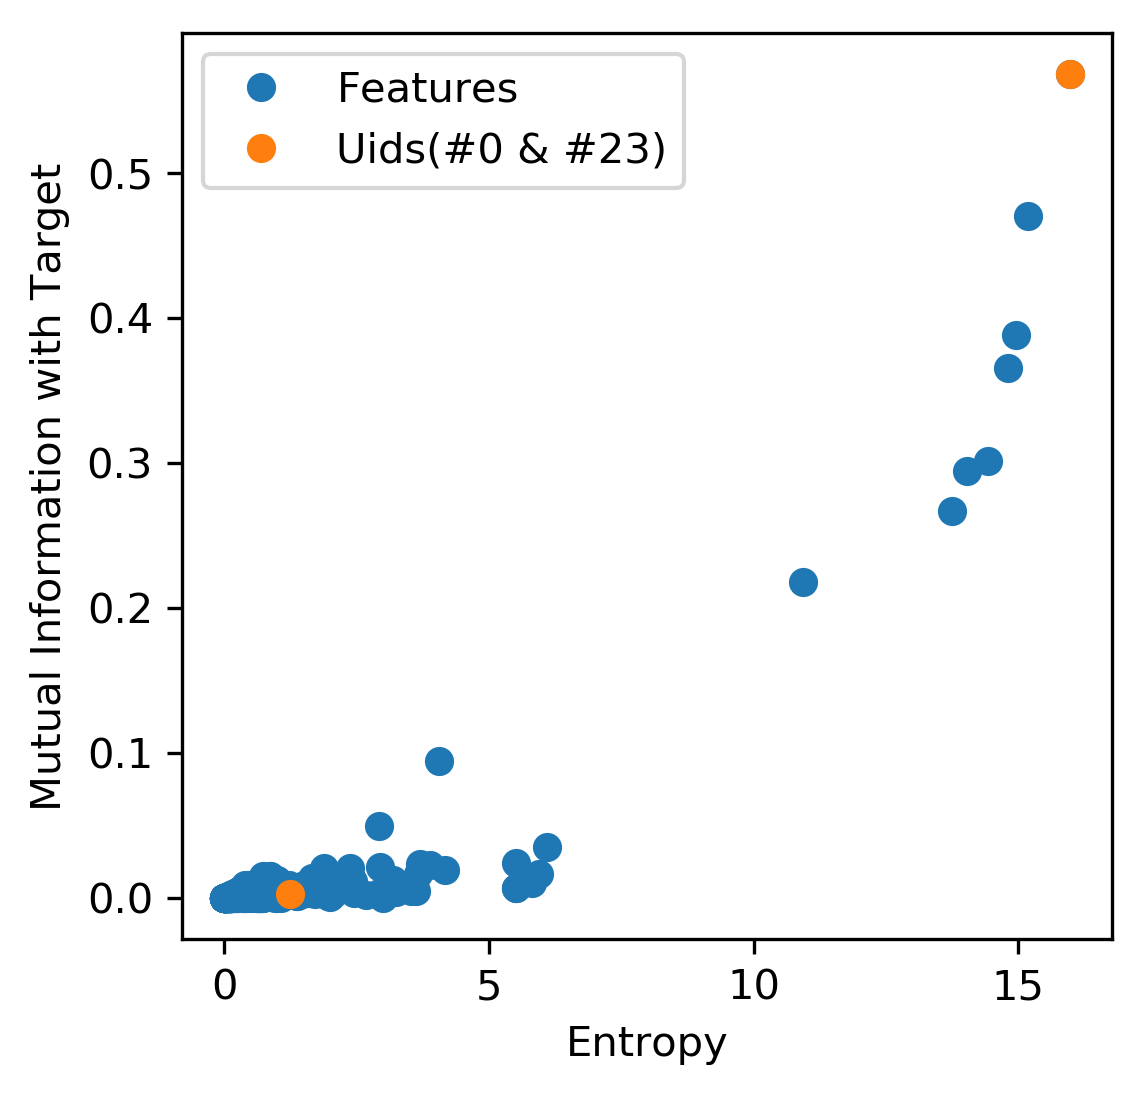

In [21]:
f, ax = plt.subplots(1, 1, figsize=(4,4), facecolor='w')
f.dpi = 300
ax.plot(entros, MIs, 'o', label='Features')
ax.plot(entros[[0, 23]], MIs[[0, 23]], 'o', label='Uids(#0 & #23)')
ax.set_xlabel('Entropy')
ax.set_ylabel('Mutual Information with Target')
ax.legend()

f.show()

In [67]:
flags1 = entros > np.percentile(entros, 50) 
flags2 = MIs > np.percentile(MIs, 50) 
flags = [a[0] & a[1] for a in zip(flags, flags2)]
flags[0] = False
flags[23] = False
idx50 = np.where(flags)[0]

True

In [69]:
X_test_reduced = [a for (idx, a) in enumerate(X_test.T) if (idx in idx50)]

In [61]:
idx50

[array([  3,   6,   7,   8,  11,  15,  17,  18,  20,  21,  24,  25,  30,
         31,  32,  33,  37,  38,  39,  40,  41,  43,  44,  46,  48,  49,
         50,  52,  53,  54,  55,  56,  57,  59,  60,  61,  62,  64,  65,
         66,  67,  70,  72,  74,  75,  76,  79,  80,  83,  85,  88,  91,
         92,  93,  94,  95,  97,  99, 101, 102, 103, 105, 106, 107, 108,
        119, 120, 138, 140, 142, 143, 144, 145, 153, 162, 167, 168, 169,
        171, 173, 174, 175, 176, 177, 178, 183, 184, 185, 186, 187, 190,
        191, 192, 195, 197, 198, 200, 202, 204, 205, 207, 209, 212, 215,
        216, 217, 219, 220, 221, 224, 226, 229, 234, 235, 237, 239, 240,
        241, 242, 243, 244, 245, 246, 247, 257, 260, 262, 265, 271, 272,
        273, 274, 275, 276, 277, 279, 280, 281, 282, 283, 284, 285, 286,
        287, 292, 293, 294, 295, 296, 297, 298, 299, 318, 329, 330, 331,
        332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344,
        345, 346, 347, 348, 349, 352, 354, 359, 360